In [14]:
import pandas as pd
import numpy as np
import sys
from matplotlib import pyplot as plt

import os

datadir = '/scr/babaie/rebasedDCJuly/resAug22/1'


def getStat(filename, stat):
    filename = os.path.join(filename).replace('\\','/')
    #print(stat)
    #print(filename)
    try:
        with open(filename) as f:
            readlines = f.readlines()
            for l in readlines:
                if stat in l:
                    return l
            return 0.0 #for cases where stat was not found
    except: #for cases where the file was not found
        return 0.0



Stats = ['system.generator.numPackets',
         'system.generator.avgReadLatency',
         'system.generator.avgWriteLatency',
         'system.generator.readBW',
         'system.generator.writeBW',
         'system.dcache_ctrl.avgORBLen',
         'system.dcache_ctrl.avgLocRdQLenStrt',
         'system.dcache_ctrl.avgLocWrQLenStrt',
         'system.dcache_ctrl.avgFarRdQLenStrt',
         'system.dcache_ctrl.avgFarWrQLenStrt',
         'system.dcache_ctrl.avgLocRdQLenEnq',
         'system.dcache_ctrl.avgLocWrQLenEnq',
         'system.dcache_ctrl.avgFarRdQLenEnq',
         'system.dcache_ctrl.avgFarWrQLenEnq',
         'system.dcache_ctrl.numWrBacks',
         'system.dcache_ctrl.totNumConf',
         'system.dcache_ctrl.totNumORBFull',
         'system.dcache_ctrl.totNumConfBufFull',
         'system.dcache_ctrl.maxNumConf',
         'system.dcache_ctrl.maxLocRdEvQ',
         'system.dcache_ctrl.maxLocRdRespEvQ',
         'system.dcache_ctrl.maxLocWrEvQ',
         'system.dcache_ctrl.maxFarRdEvQ',
         'system.dcache_ctrl.maxFarRdRespEvQ',
         'system.dcache_ctrl.maxFarWrEvQ',
         'system.dcache_ctrl.rdToWrTurnAround',
         'system.dcache_ctrl.wrToRdTurnAround',
         'system.dcache_ctrl.sentRdPort',
         'system.dcache_ctrl.failedRdPort',
         'system.dcache_ctrl.recvdRdPort',
         'system.dcache_ctrl.sentWrPort',
         'system.dcache_ctrl.failedWrPort',
         'system.dcache_ctrl.totPktsServiceTime',
         'system.dcache_ctrl.totPktsORBTime',
         'system.dcache_ctrl.totTimeFarRdtoSend',
         'system.dcache_ctrl.totTimeFarRdtoRecv',
         'system.dcache_ctrl.totTimeFarWrtoSend',
         'system.dcache_ctrl.totTimeInLocRead',
         'system.dcache_ctrl.totTimeInLocWrite',
         'system.dcache_ctrl.totTimeInFarRead',
         'system.dcache_ctrl.QTLocRd',
         'system.dcache_ctrl.QTLocWr',
         'system.dcache_ctrl.dram.avgQLat',
         'system.farMem_ctrl.dram.avgQLat',
         'system.farMem_ctrl.avgRdQLen',
         'system.farMem_ctrl.avgWrQLen'
          ]




hit_miss = ['MissClean', 'MissDirty']
link_latency = ['0', '200', '300', '400', '500', '600', '700', '800', '900', '1000', '1200', '1400', '1600', 
'2000', '2200', '2400', '2600', '2800', '3200', '3500', '3700', '4000', '5000', '6000', '7000', '10000', '20000']
rd_perc = ['RO']
inj_rate = ['4', '8', '812', '825', '837', '85', '9', '95', '10', '12', '14', '16']

rows = []

for hm in hit_miss:
    for ir in inj_rate:
        for rdPr in rd_perc:
            for ll in link_latency:
                stats = [hm, ir, rdPr, ll]
                for stat in Stats:
                    time_file_path = '{}/{}_{}_{}_{}/stats.txt'.format(datadir, hm, ir, rdPr, ll)
                    ret_line = getStat(time_file_path,stat)

                    if ret_line != 0:
                        #if ret_line=='nan' :
                        #    stat_val = 0
                        #else:
                        stat_val = ret_line.split()[1]
                    else:
                        stat_val = -1
                    stats.append(stat_val)

                rows.append(stats)

#print(rows)
df = pd.DataFrame(rows, columns=[
         'hm',
         'ir',
         'rdPr',
         'll',
         'numPackets',
         'avgReadLatency',
         'avgWriteLatency',
         'readBW',
         'writeBW',
         'avgORBLen',
         'avgLocRdQLenStrt',
         'avgLocWrQLenStrt',
         'avgFarRdQLenStrt',
         'avgFarWrQLenStrt',
         'avgLocRdQLenEnq',
         'avgLocWrQLenEnq',
         'avgFarRdQLenEnq',
         'avgFarWrQLenEnq',
         'numWrBacks',
         'totNumConf',
         'totNumORBFull',
         'totNumConfBufFull',
         'maxNumConf',
         'maxLocRdEvQ',
         'maxLocRdRespEvQ',
         'maxLocWrEvQ',
         'maxFarRdEvQ',
         'maxFarRdRespEvQ',
         'maxFarWrEvQ',
         'rdToWrTurnAround',
         'wrToRdTurnAround',
         'sentRdPort',
         'failedRdPort',
         'recvdRdPort',
         'sentWrPort',
         'failedWrPort',
         'totPktsServiceTime',
         'totPktsORBTime',
         'totTimeFarRdtoSend',
         'totTimeFarRdtoRecv',
         'totTimeFarWrtoSend',
         'totTimeInLocRead',
         'totTimeInLocWrite',
         'totTimeInFarRead',
         'QTLocRd',
         'QTLocWr',
         'loc.avgQLat',
         'far.avgQLat',
         'avgRdQLen',
         'avgWrQLen'
         ])

df['totBW'] = (df['readBW'].astype(float) + df['writeBW'].astype(float))/1000000000
df['ARL'] = (df['avgReadLatency'].astype(float))/1000
df['AWL'] = (df['avgWriteLatency'].astype(float))/1000

df['servTime'] = df['totPktsServiceTime'].astype(float)/df['numPackets'].astype(float)
df['orbTime'] = df['totPktsORBTime'].astype(float)/df['numPackets'].astype(float)

df['locRd'] = df['totTimeInLocRead'].astype(float)/df['numPackets'].astype(float)
df['farRd'] = df['totTimeInFarRead'].astype(float)/df['numPackets'].astype(float)
df['locWr'] = df['totTimeInLocWrite'].astype(float)/df['numPackets'].astype(float)

df['locRdQT'] = df['QTLocRd'].astype(float)/df['numPackets'].astype(float)
df['farRdQT'] = (df['totTimeFarRdtoSend'].astype(float)+df['totTimeFarRdtoRecv'].astype(float))/df['sentRdPort'].astype(float)
df['locWrQT'] = df['QTLocWr'].astype(float)/df['numPackets'].astype(float)
df['farWrQT'] = df['totTimeFarWrtoSend'].astype(float)/df['sentWrPort'].astype(float)
df['farRdWRT'] = df['totTimeFarRdtoRecv'].astype(float)/df['recvdRdPort'].astype(float)

df['locAvgQLat'] = df['loc.avgQLat'].astype(float)/1000
df['farAvgQLat'] = df['far.avgQLat'].astype(float)/1000



df.to_csv("/scr/babaie/rebasedDCJuly/resAug22/1/res_1.csv")

In [ ]:
print(df['hm'=='MissClean'])

The next set of graphs are stacked bars for:
* DDR4-DDR4  With different link latencies
* RO-Miss-Clean
* RO-Miss-Dirty

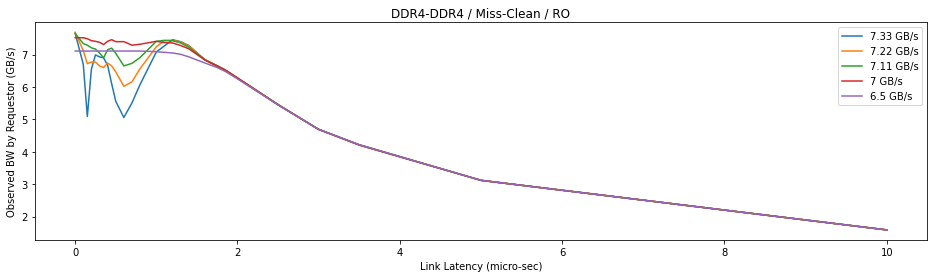

In [23]:
# create data
#x = ['0','0.1','0.15','0.2','0.25','0.3','0.35','0.4','0.45','0.5','0.6','0.7','0.8','1','1.1','1.2','1.3','1.4','1.6','1.75','1.85','2','2.5','3','3.5','5','10']
x = [0, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.6, 0.7, 0.8, 1, 1.1, 1.2, 1.3, 1.4, 1.6, 1.75, 1.85, 2, 2.5, 3, 3.5, 5, 10]
y1 = [7.47, 5.57, 6.28, 5.27, 4.62, 4.84, 6.18, 6.21, 6.05, 6.01, 5.61, 5.46, 5.53, 5.12, 5.62, 6.27, 7.11, 7.26, 6.77, 6.47, 6.37, 6.21, 5.44, 4.68, 4.21, 3.12, 1.59]
y2 = [7.47, 6.71, 6.16, 5.82, 5.22, 5.42, 6.13, 6.67, 6.81, 5.80, 4.74, 5.32, 5.67, 6.69, 7.07, 7.33, 7.43, 7.31, 6.83, 6.62, 6.49, 6.28, 5.46, 4.70, 4.21, 3.12, 1.59]

y2_1 = [7.66, 6.7, 5.09, 6.55, 6.99, 6.93, 6.9, 6.67, 6.1, 5.56, 5.06, 5.51, 6.08, 7.08, 7.27, 7.46, 7.4, 7.28, 6.84, 6.63, 6.51, 6.27, 5.45, 4.7, 4.21, 3.12, 1.59]
y2_2 = [7.69, 7.12, 6.72, 6.77, 6.77, 6.65, 6.6, 6.74, 6.65, 6.47, 6.02, 6.16, 6.57, 7.24, 7.43, 7.44, 7.39, 7.27, 6.84, 6.65, 6.52, 6.28, 5.46, 4.69, 4.21, 3.12, 1.59]
y2_3 = [7.65, 7.34, 7.29, 7.21, 7.17, 7.05, 6.9, 7.15, 7.2, 7.04, 6.65, 6.73, 6.91, 7.41, 7.44, 7.43, 7.36, 7.23, 6.84, 6.66, 6.53, 6.28, 5.46, 4.69, 4.22, 3.12, 1.59]
y3 = [7.52, 7.52, 7.49, 7.43, 7.41, 7.38, 7.31, 7.41, 7.46, 7.40, 7.40, 7.29, 7.32, 7.41, 7.37, 7.36, 7.28, 7.18, 6.83, 6.65, 6.52, 6.28, 5.45, 4.69, 4.21, 3.12, 1.59]

y4 = [7.11, 7.11, 7.11, 7.11, 7.11, 7.11, 7.11, 7.11, 7.11, 7.11, 7.11, 7.11, 7.11, 7.09, 7.07, 7.05, 7.01, 6.93, 6.74, 6.60, 6.48, 6.25, 5.45, 4.69, 4.22, 3.12, 1.59]
y5 = [6.74, 6.74, 6.74, 6.74, 6.74, 6.74, 6.74, 6.74, 6.74, 6.74, 6.74, 6.74, 6.74, 6.74, 6.73, 6.73, 6.71, 6.67, 6.55, 6.47, 6.38, 6.20, 5.44, 4.68, 4.22, 3.12, 1.59]
y6 = [6.40, 6.40, 6.40, 6.40, 6.40, 6.40, 6.40, 6.40, 6.40, 6.40, 6.40, 6.40, 6.40, 6.40, 6.40, 6.40, 6.40, 6.39, 6.34, 6.26, 6.21, 6.10, 5.41, 4.68, 4.22, 3.12, 1.59]

y7 = [5.33, 5.33, 5.33, 5.33, 5.33, 5.33, 5.33, 5.33, 5.33, 5.33, 5.33, 5.33, 5.33, 5.33, 5.33, 5.33, 5.33, 5.33, 5.33, 5.33, 5.33, 5.33, 5.17, 4.64, 4.21, 3.12, 1.59]
y8 = [4.57, 4.57, 4.57, 4.57, 4.57, 4.57, 4.57, 4.57, 4.57, 4.57, 4.57, 4.57, 4.57, 4.57, 4.57, 4.57, 4.57, 4.57, 4.57, 4.57, 4.57, 4.57, 4.57, 4.45, 4.18, 3.12, 1.59]
y9 = [4.00, 4.00, 4.00, 4.00, 4.00, 4.00, 4.00, 4.00, 4.00, 4.00, 4.00, 4.00, 4.00, 4.00, 4.00, 4.00, 4.00, 4.00, 4.00, 4.00, 4.00, 4.00, 4.00, 4.00, 3.94, 3.11, 1.59]

fig = plt.figure()
fig.set_size_inches(16, 4)

# plot lines
#plt.plot(x, y1, label ="15 GB/s")
#plt.scatter(x, y1)

#plt.plot(x, y2, label ="7.5 GB/s")
#plt.scatter(x, y2)

plt.plot(x, y2_1, label ="7.33 GB/s") #8.12
plt.plot(x, y2_2, label ="7.22 GB/s") #8.25
plt.plot(x, y2_3, label ="7.11 GB/s") #8.37


plt.plot(x, y3, label ="7 GB/s") #8.5
#plt.scatter(x, y3)

plt.plot(x, y4, label ="6.5 GB/s")
#plt.scatter(x, y4)

#plt.plot(x, y5, label ="6.25 GB/s")
#plt.scatter(x, y5)

#plt.plot(x, y6, label ="6 GB/s") #10
#plt.scatter(x, y6)

#plt.plot(x, y7, label ="5 GB/s")
#plt.scatter(x, y7)

#plt.plot(x, y8, label ="4.25 GB/s")
#plt.scatter(x, y8)

#plt.plot(x, y9, label ="3.75 GB/s")
#plt.scatter(x, y9)


plt.title("DDR4-DDR4 / Miss-Clean / RO")
plt.xlabel("Link Latency (micro-sec)")
plt.ylabel("Observed BW by Requestor (GB/s)")
plt.legend()
plt.show()

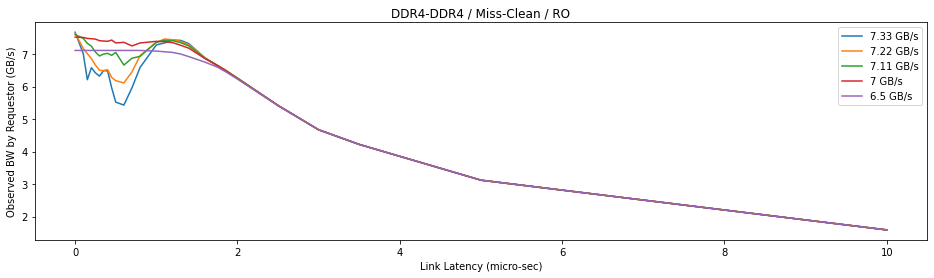

In [24]:
# create data
#x = ['0','0.1','0.15','0.2','0.25','0.3','0.35','0.4','0.45','0.5','0.6','0.7','0.8','1','1.1','1.2','1.3','1.4','1.6','1.75','1.85','2','2.5','3','3.5','5','10']
x = [0, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.6, 0.7, 0.8, 1, 1.1, 1.2, 1.3, 1.4, 1.6, 1.75, 1.85, 2, 2.5, 3, 3.5, 5, 10]


y2_1 = [7.67, 7.01, 6.21, 6.58, 6.42, 6.32, 6.49, 6.48, 5.96, 5.52, 5.43, 5.96, 6.59, 7.28, 7.34, 7.43, 7.42, 7.32, 6.88, 6.64, 6.49, 6.25, 5.42, 4.67, 4.22, 3.12, 1.59]
y2_2 = [7.64, 7.17, 7.01, 6.86, 6.66, 6.5, 6.49, 6.52, 6.28, 6.18, 6.11, 6.45, 6.95, 7.36, 7.46, 7.44, 7.39, 7.29, 6.88, 6.65, 6.51, 6.26, 5.42, 4.67, 4.22, 3.12, 1.59]
y2_3 = [7.6, 7.48, 7.33, 7.24, 7.06, 6.94, 7, 7.02, 6.96, 7.05, 6.66, 6.87, 6.93, 7.36, 7.42, 7.41, 7.35, 7.25, 6.87, 6.66, 6.5, 6.26, 5.41, 4.67, 4.22, 3.12, 1.59]
y3 = [7.52, 7.51, 7.48, 7.47, 7.46, 7.41, 7.40, 7.39, 7.43, 7.34, 7.36, 7.25, 7.34, 7.39, 7.38, 7.35, 7.27, 7.18, 6.86, 6.65, 6.50, 6.24, 5.42, 4.67, 4.22, 3.12, 1.59]
y4 = [7.11, 7.11, 7.11, 7.11, 7.11, 7.11, 7.11, 7.11, 7.11, 7.11, 7.11, 7.11, 7.11, 7.09, 7.07, 7.05, 7.00, 6.92, 6.75, 6.60, 6.46, 6.23, 5.41, 4.67, 4.22, 3.12, 1.59]


fig = plt.figure()
fig.set_size_inches(16, 4)



plt.plot(x, y2_1, label ="7.33 GB/s")
plt.plot(x, y2_2, label ="7.22 GB/s")
plt.plot(x, y2_3, label ="7.11 GB/s")

plt.plot(x, y3, label ="7 GB/s")

plt.plot(x, y4, label ="6.5 GB/s")




plt.title("DDR4-DDR4 / Miss-Clean / RO")
plt.xlabel("Link Latency (micro-sec)")
plt.ylabel("Observed BW by Requestor (GB/s)")
plt.legend()
plt.show()